# Вводные
- __Данные__ - сгенерированный набор данных с возможными результатами двух тестов на Covid
- __Задача__ - проанализировать предоставленные данные и определить есть ли различия в "проведенных" тестах.

In [93]:
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
df = pd.read_csv("data/covid.csv")

In [66]:
print(f"df.shape: {df.shape}")
df.sample(5)

df.shape: (10000, 3)


,y_true,y_pred1,y_pred2
8346,0,0,0
1562,0,0,0
1359,0,0,0
2949,0,0,0
341,0,0,0


## Error Rate

In [69]:
er_pred1 = (df["y_true"] != df["y_pred1"]).mean()
er_pred2 = (df["y_true"] != df["y_pred2"]).mean()
print(f"Error Rate. pred_1: {er_pred1}, pred_2: {er_pred2}\n"
      f"Accuracy. pred_1: {1 - er_pred1:.2%}, pred_2: {1 - er_pred2:.2%}")

Error Rate. pred_1: 0.18, pred_2: 0.18
Accuracy. pred_1: 82.00%, pred_2: 82.00%


В обоих тестах процент ошибок/accuracy показывают одинаковые значения. Но не стоит так трактовать эти цифры.
Ведь Accuracy:
- зависит от сбалансированности классов Positive/Negative
- не чувствует разницу между FP/FN

Поэтому посчитаем % ошибок отдельно для каждого класса (Positive/Negative)

## True Positive Rate & True Negative Rate

In [67]:
positives = df[df["y_true"] == 1].copy()
negatives = df[df["y_true"] == 0].copy()

In [81]:
tpr_pred1 = (positives["y_true"] == positives["y_pred1"]).mean()
tpr_pred2 = (positives["y_true"] == positives["y_pred2"]).mean()

tnr_pred1 = (negatives["y_true"] == negatives["y_pred1"]).mean()
tnr_pred2 = (negatives["y_true"] == negatives["y_pred2"]).mean()

print(f"Pred_1: TPR [Sensitivity]: {tpr_pred1:.2%}, True Negative Rate [Specificity]: {tnr_pred1:.2%}\n"
      f"Pred_2: TPR [Sensitivity]: {tpr_pred2:.2%}, True Negative Rate [Specificity]: {tnr_pred2:.2%}")

# print(f"True Positive Rate [Sensitivity]. pred_1: {tpr_pred1:.2%}, pred_2: {tpr_pred2:.2%}\n"
#       f"True Negative Rate [Specificity]. pred_1: {tnr_pred1:.2%}, pred_2: {tnr_pred2:.2%}")

Pred_1: TPR [Sensitivity]: 70.50%, True Negative Rate [Specificity]: 93.90%
Pred_2: TPR [Sensitivity]: 65.59%, True Negative Rate [Specificity]: 98.98%


И вот в таком разрезе разница между тестами сразу становится заметной. Полученные результаты можно трактовать следующим образом:
- __Pred_1__. __TPR__ говорит о том, что в 70% случаев данный тест корректно диагностирует заболевание у болеющего человека. А __TNR__ говорит о том, что в 93% случаев данный тест корректно определяет отсутствие болезни у здороовго человека.
- __Pred_2__. __TPR__ говорит о том, что в 65% случаев данный тест корректно диагностирует заболевание у болеющего человека. А __TNR__ говорит о том, что в 98% случаев данный тест корректно определяет отсутствие болезни у здорового человека.

__Промежуточный итог__ - первый тест лучше диагностирует болезнь у действительно болеющих. Второй тест лучше диагностирует отсутствие болезни у здоровых.

In [92]:
# Проверим расчеты на уже готовых функциях
tpr_pred1_sl = recall_score(df["y_true"], df["y_pred1"])
tnr_pred1_sl = recall_score(df["y_true"], df["y_pred1"], pos_label=0)
tpr_pred2_sl = recall_score(df["y_true"], df["y_pred2"])
tnr_pred2_sl = recall_score(df["y_true"], df["y_pred2"], pos_label=0)

print(f"Pred_1[manual|sklearn]: TPR: {tpr_pred1}|{tpr_pred1_sl}, TNR: {tnr_pred1}|{tnr_pred1_sl}\n"
      f"Pred_2[manual|sklearn]: TPR: {tpr_pred2}|{tpr_pred2_sl}, TNR: {tnr_pred2}|{tnr_pred2_sl}\n")


Pred_1[manual|sklearn]: TPR: 0.7050147492625368|0.7050147492625368, TNR: 0.9389623601220752|0.9389623601220752
Pred_2[manual|sklearn]: TPR: 0.655850540806293|0.655850540806293, TNR: 0.9898270600203459|0.9898270600203459



## Confusion Matrix

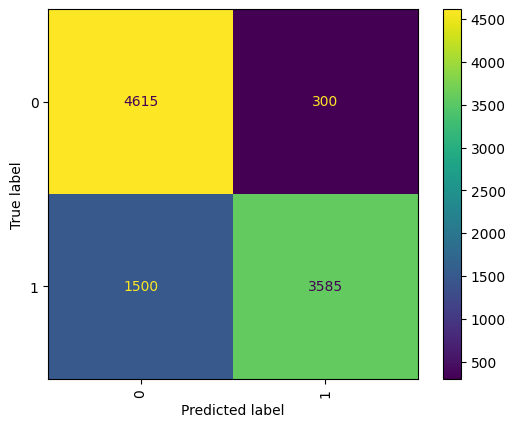

In [102]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

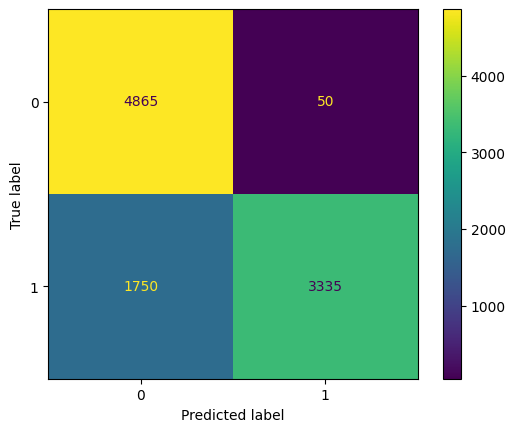

In [103]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Вводные
- __Данные__ - сгенерированный набор данных с возможными результатами двух тестов на беременность.
- __Задача__ - проанализировать предоставленные данные и определить есть ли различия в "проведенных" тестах.

In [104]:
df = pd.read_csv("data/pregnancy.csv")

In [106]:
print(f"df.shape: {df.shape}")
df.sample(5)

df.shape: (10000, 3)


,y_true,y_pred1,y_pred2
1155,1,1,1
832,1,1,1
8841,0,0,0
8846,0,0,0
6544,0,0,0


In [108]:
tpr_pred1 = recall_score(df["y_true"], df["y_pred1"])
tnr_pred1 = recall_score(df["y_true"], df["y_pred1"], pos_label=0)
tpr_pred2 = recall_score(df["y_true"], df["y_pred2"])
tnr_pred2 = recall_score(df["y_true"], df["y_pred2"], pos_label=0)

print(f"Pred_1: TPR: {tpr_pred1:.2%}, TNR: {tnr_pred1:.2%}\n"
      f"Pred_2: TPR: {tpr_pred2:.2%}, TNR: {tnr_pred2:.2%}")

Pred_1: TPR: 99.02%, TNR: 90.84%
Pred_2: TPR: 95.08%, TNR: 94.91%


In [111]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

In [112]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

Полученные результаты можно трактовать следующим образом:
- __Pred_1__. __TPR__ говорит о том, что в 99% случаев данный тест корректно диагностирует наличие беременности у беременных. А __TNR__ говорит о том, что в 90% случаев данный тест корректно определяет отсутствие беременности у не беременных.
- __Pred_2__. __TPR__ говорит о том, что в 95% случаев данный тест корректно диагностирует наличие беременности у беременных. А __TNR__ говорит о том, что в 94% случаев данный тест корректно определяет отсутствие беременности у не беременных.